## Importing libraries

In [1]:
import pandas as pd

base_path = 'data/'

## Movies dataset

Lets explore movies dataset

In [2]:
movies = pd.read_table(base_path+'movies.dat', encoding="ISO-8859-1")
print(movies)

          id                        title   imdbID  \
0          1                    Toy story   114709   
1          2                      Jumanji   113497   
2          3               Grumpy Old Men   107050   
3          4            Waiting to Exhale   114885   
4          5  Father of the Bride Part II   113041   
...      ...                          ...      ...   
10192  65088              Bedtime Stories   960731   
10193  65091          Manhattan Melodrama    25464   
10194  65126                        Choke  1024715   
10195  65130           Revolutionary Road   959337   
10196  65133      Blackadder Back & Forth   212579   

                                            spanishTitle  \
0                                   Toy story (juguetes)   
1                                                Jumanji   
2                                    Dos viejos gruñones   
3                                   Esperando un respiro   
4      Vuelve el padre de la novia (Ahora también a

Just to get overview of all columns in movies dataset.

Checking missing values for important atributes.

Just imdbPictureURL has 181 missing values.

In [3]:
print(movies.id.isna().sum())
print(movies.title.isna().sum())
print(movies.year.isna().sum())
print(movies.imdbPictureURL.isna().sum())
print(movies.rtPictureURL.isna().sum())

0
0
0
181
0


In [4]:
movies = movies[['id', 'title', 'year']]

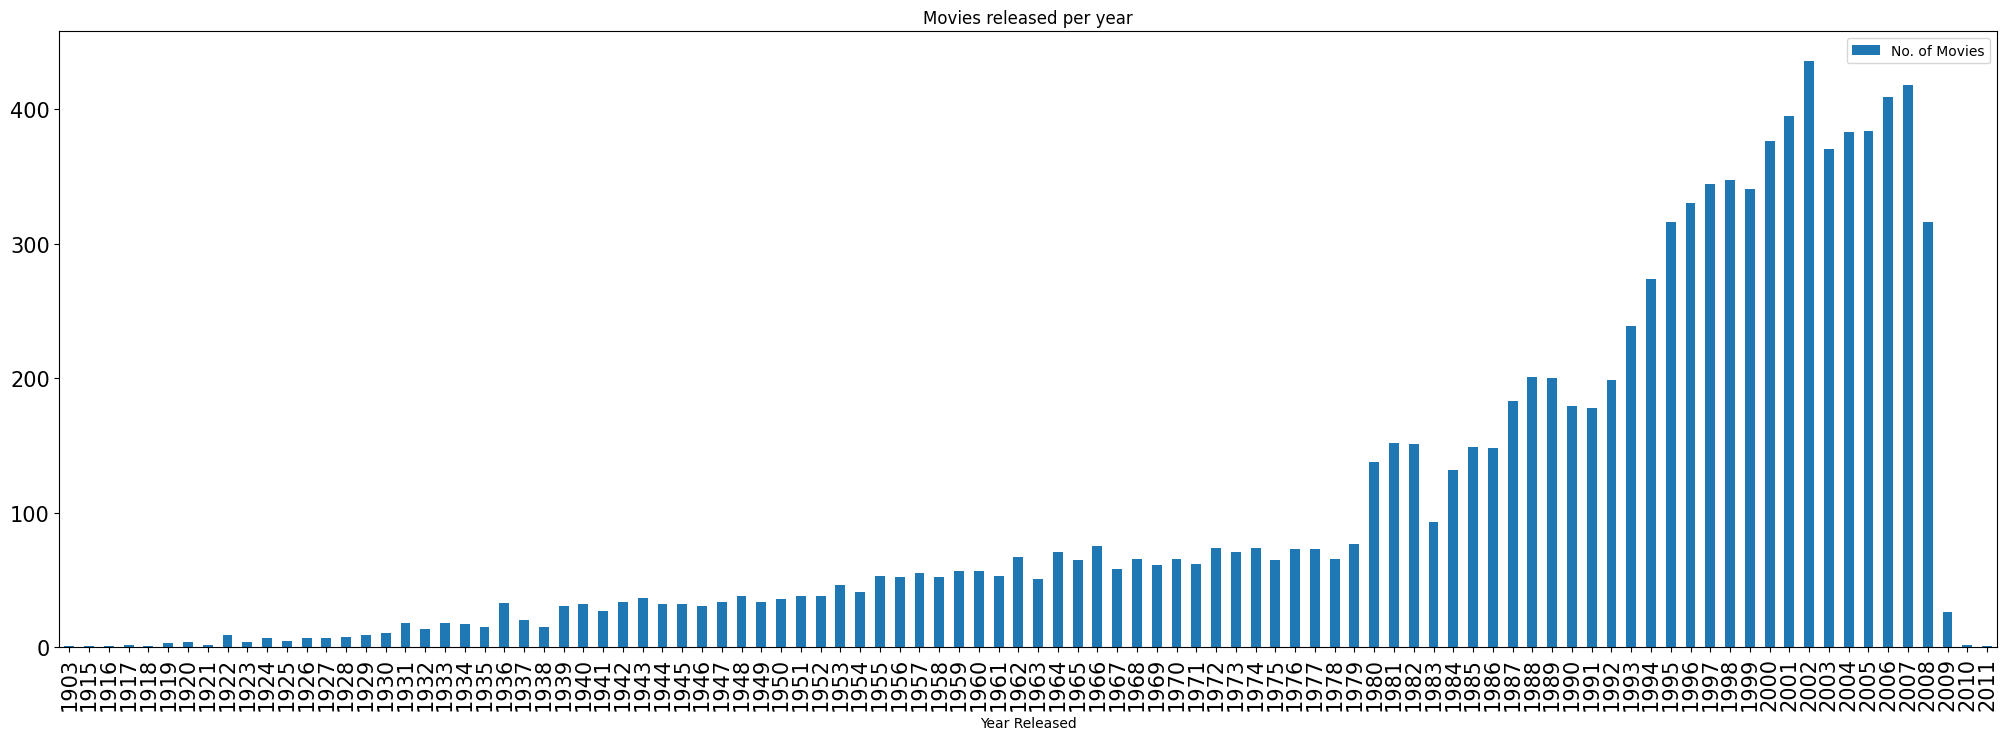

In [5]:
movie_year_data = movies[['year', 'id']].groupby(['year']).count().reset_index().rename(columns={'year':'Year Released', 'id':'No. of Movies'})
movie_year_data.plot.bar('Year Released', 'No. of Movies', title='Movies released per year', figsize=(25, 8), fontsize=15);

In [6]:
ratings = pd.read_table(base_path+'user_ratedmovies.dat', encoding="ISO-8859-1")
print(ratings)

        userID  movieID  rating  date_day  date_month  date_year  date_hour  \
0           75        3     1.0        29          10       2006         23   
1           75       32     4.5        29          10       2006         23   
2           75      110     4.0        29          10       2006         23   
3           75      160     2.0        29          10       2006         23   
4           75      163     4.0        29          10       2006         23   
...        ...      ...     ...       ...         ...        ...        ...   
855593   71534    44555     4.0         3          12       2007          3   
855594   71534    46578     4.0         3          12       2007          2   
855595   71534    48516     4.5         3          12       2007          2   
855596   71534    61075     5.0        10          10       2008          9   
855597   71534    62049     4.5        10          10       2008          9   

        date_minute  date_second  
0               

In [7]:
ratings = ratings[['userID',  'movieID',  'rating', 'date_day', 'date_month', 'date_year']]
print(ratings)

        userID  movieID  rating  date_day  date_month  date_year
0           75        3     1.0        29          10       2006
1           75       32     4.5        29          10       2006
2           75      110     4.0        29          10       2006
3           75      160     2.0        29          10       2006
4           75      163     4.0        29          10       2006
...        ...      ...     ...       ...         ...        ...
855593   71534    44555     4.0         3          12       2007
855594   71534    46578     4.0         3          12       2007
855595   71534    48516     4.5         3          12       2007
855596   71534    61075     5.0        10          10       2008
855597   71534    62049     4.5        10          10       2008

[855598 rows x 6 columns]


In [8]:
ratings.describe()

,userID,movieID,rating,date_day,date_month,date_year
count,855598.000000,855598.000000,855598.000000,855598.000000,855598.000000,855598.000000
mean,35190.832551,8710.179402,3.437945,15.568924,6.540795,2005.323717
std,20385.003347,14446.852908,1.002561,8.951201,3.506399,2.282697
min,75.000000,1.000000,0.500000,1.000000,1.000000,1997.000000
25%,18161.000000,1367.000000,3.000000,8.000000,4.000000,2004.000000
50%,33866.000000,3249.000000,3.500000,15.000000,7.000000,2006.000000
75%,52004.000000,6534.000000,4.000000,23.000000,10.000000,2007.000000
max,71534.000000,65133.000000,5.000000,31.000000,12.000000,2009.000000


In [9]:
print('Years:', ratings.date_year.unique())
print('Months', ratings.date_month.unique())
print('No. of Unique users:', ratings.userID.nunique())
print('No. of Unique movies:', ratings.movieID.nunique())
print('Unique ratings:', ratings.rating.unique())
print('Max rating', ratings.rating.max())
print('Min rating', ratings.rating.min())
print('Average rating:', round(ratings.rating.mean(), 2))
print('Frequency of each rating:')
print(ratings['rating'].value_counts())

Years: [2006 2004 2007 2005 2003 2008 2009 2002 2000 1999 2001 1997 1998]
Months [10  4  5  7  8 11 12  9  6  2  1  3]
No. of Unique users: 2113
No. of Unique movies: 10109
Unique ratings: [1.  4.5 4.  2.  3.5 5.  3.  0.5 2.5 1.5]
Max rating 5.0
Min rating 0.5
Average rating: 3.44
Frequency of each rating:
4.0    215773
3.0    155918
3.5    150582
4.5     88652
5.0     71680
2.5     62454
2.0     57188
1.0     21535
1.5     18328
0.5     13488
Name: rating, dtype: int64


In [10]:
ratings.head()

,userID,movieID,rating,date_day,date_month,date_year
0,75,3,1.0,29,10,2006
1,75,32,4.5,29,10,2006
2,75,110,4.0,29,10,2006
3,75,160,2.0,29,10,2006
4,75,163,4.0,29,10,2006


In [11]:
ratings.tail()

,userID,movieID,rating,date_day,date_month,date_year
855593,71534,44555,4.0,3,12,2007
855594,71534,46578,4.0,3,12,2007
855595,71534,48516,4.5,3,12,2007
855596,71534,61075,5.0,10,10,2008
855597,71534,62049,4.5,10,10,2008


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855598 entries, 0 to 855597
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   userID      855598 non-null  int64  
 1   movieID     855598 non-null  int64  
 2   rating      855598 non-null  float64
 3   date_day    855598 non-null  int64  
 4   date_month  855598 non-null  int64  
 5   date_year   855598 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 39.2 MB


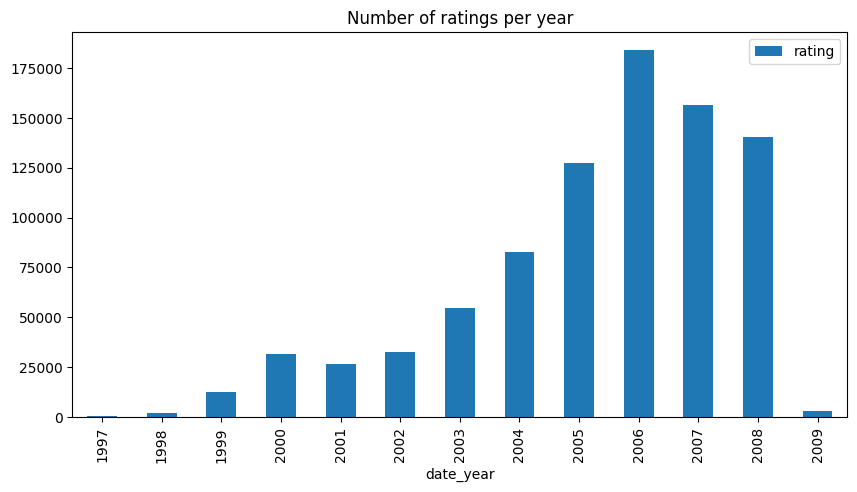

In [13]:
ratings[['date_year', 'rating']].groupby(['date_year']).count().reset_index().plot.bar(x='date_year', y='rating', title='Number of ratings per year', figsize=(10, 5));


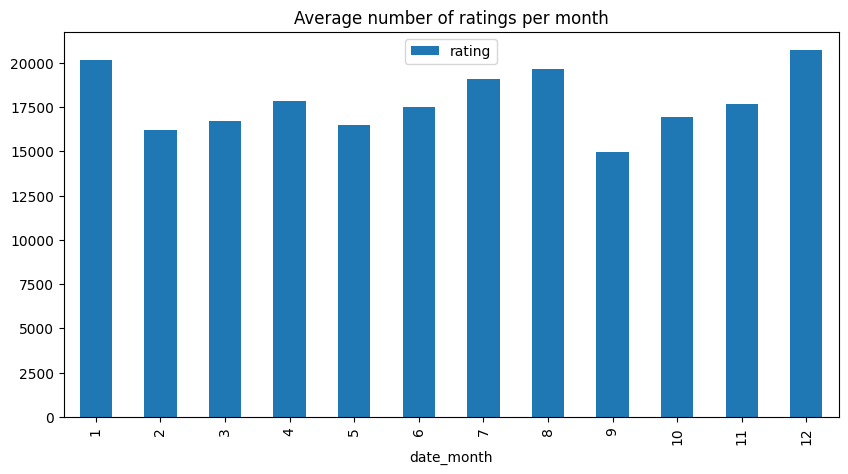

In [14]:
monthly_ratings = ratings[['date_month', 'rating']].groupby(['date_month']).count().reset_index()
monthly_ratings['rating'] = monthly_ratings['rating'] / 4
monthly_ratings.plot.bar(x='date_month', y='rating', title='Average number of ratings per month', figsize=(10, 5));

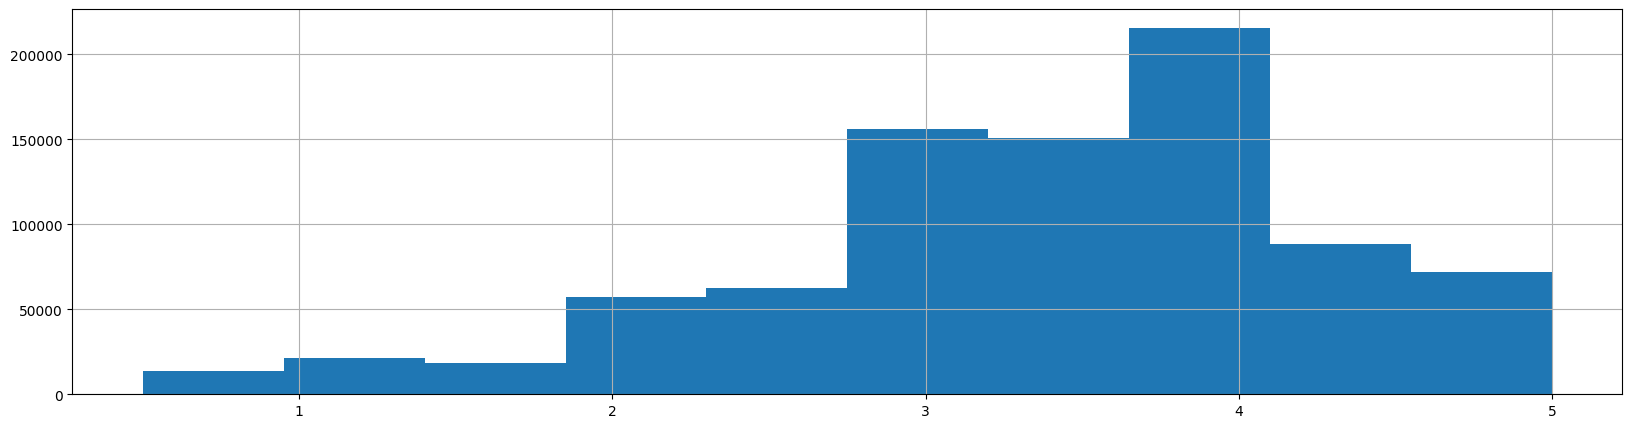

In [15]:
ratings['rating'].hist(figsize=(20, 5));


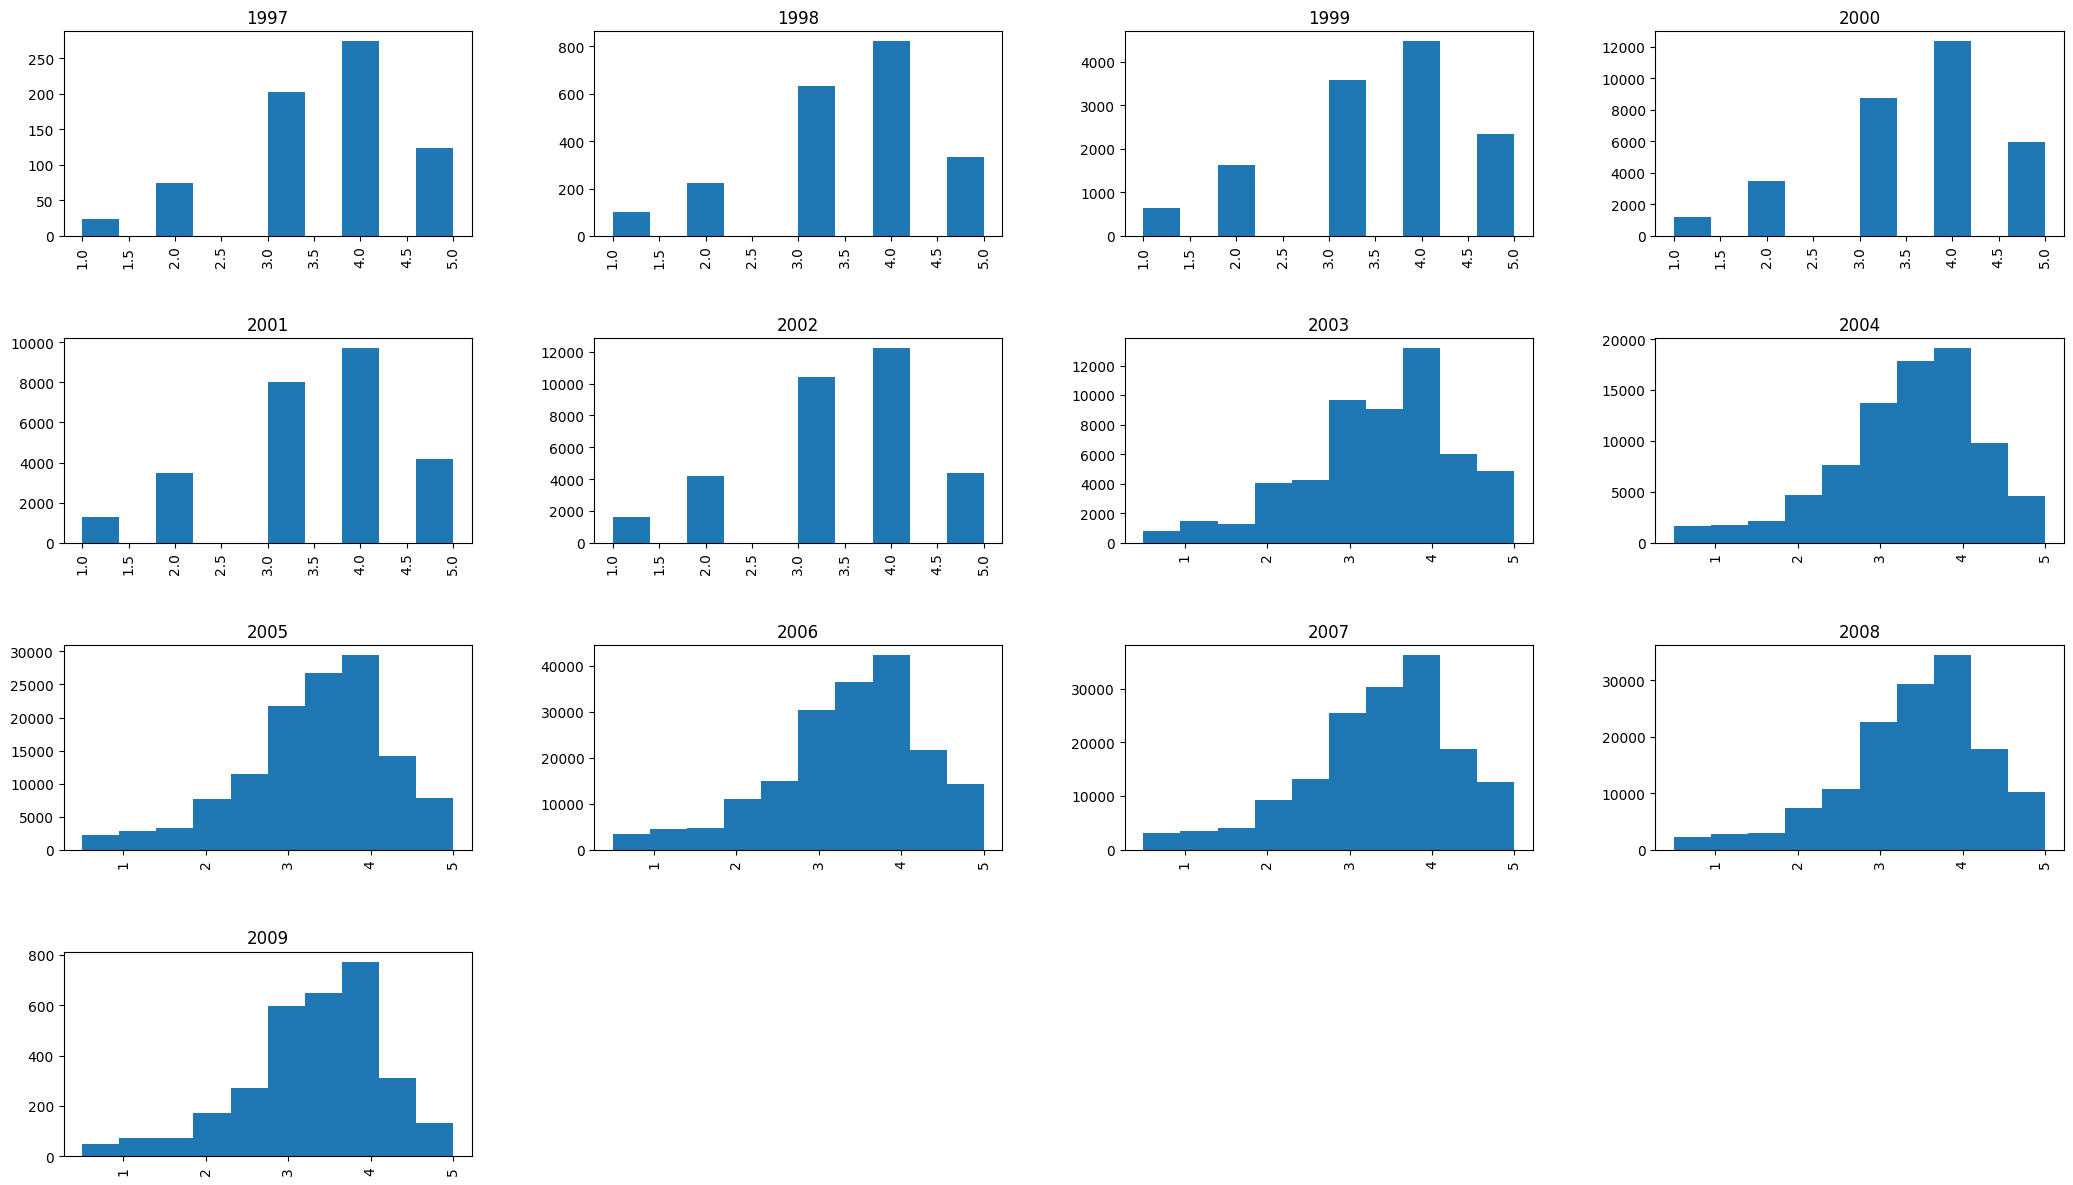

In [16]:
ratings['rating'].hist(by=ratings['date_year'], figsize=(25, 15));


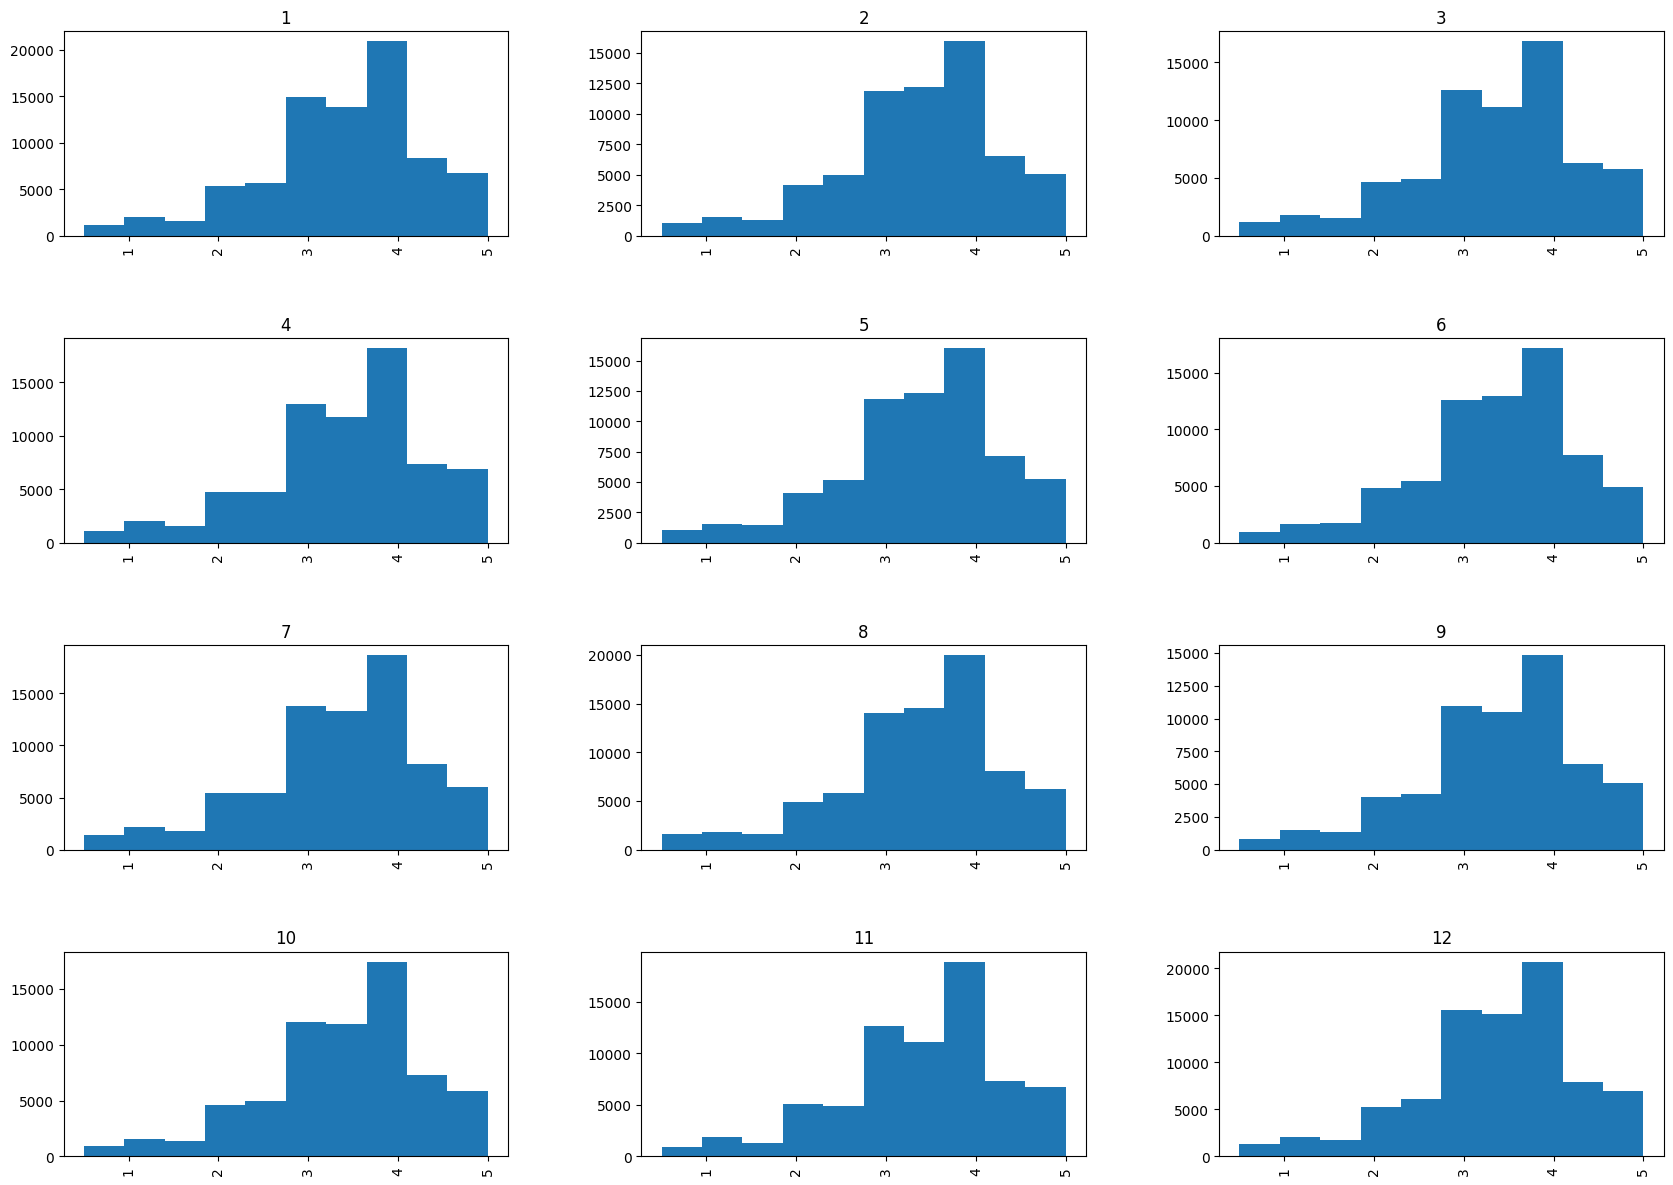

In [17]:
ratings['rating'].hist(by=ratings['date_month'], figsize=(20, 15));
